In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn  import linear_model
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
TaxiFare_df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
#df.to_csv("C:/Users/vasud/project/TaxiFare.csv")

In [4]:
TaxiFare_df.shape

(50000, 8)

In [5]:
TaxiFare_df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
TaxiFare_df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
4380,52:00.0,6.5,2011-07-27 12:52:00 UTC,-73.975040,40.757095,-73.967028,40.748943,1
39746,36:27.0,19.0,2014-12-26 11:36:27 UTC,-73.978467,40.761892,-73.993184,40.714403,4
7513,57:00.0,4.5,2011-06-21 14:57:00 UTC,-73.981198,40.779148,-73.972858,40.790597,4
2572,22:00.0,12.5,2014-12-20 15:22:00 UTC,-73.979165,40.761890,-73.994485,40.750257,4
40936,19:00.0,6.5,2009-04-03 04:19:00 UTC,-73.980040,40.726765,-73.998782,40.711920,1
28216,04:35.0,15.5,2013-05-02 21:04:35 UTC,-73.978378,40.751377,-74.000077,40.708065,1
15993,09:00.0,9.5,2013-05-03 07:09:00 UTC,-73.938322,40.796307,-73.963442,40.768537,1
4035,18:00.0,5.0,2013-12-27 11:18:00 UTC,-73.975605,40.789477,-73.968690,40.791217,1
13639,34:00.0,8.9,2012-08-11 15:34:00 UTC,-73.983330,40.741522,-73.970188,40.768135,1
49166,37:01.0,8.5,2009-05-20 06:37:01 UTC,-73.958379,40.768875,-73.985047,40.759949,1


In [7]:
TaxiFare_df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
TaxiFare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


## FINDING MISSING VALUES

In [9]:
TaxiFare_df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<AxesSubplot:>

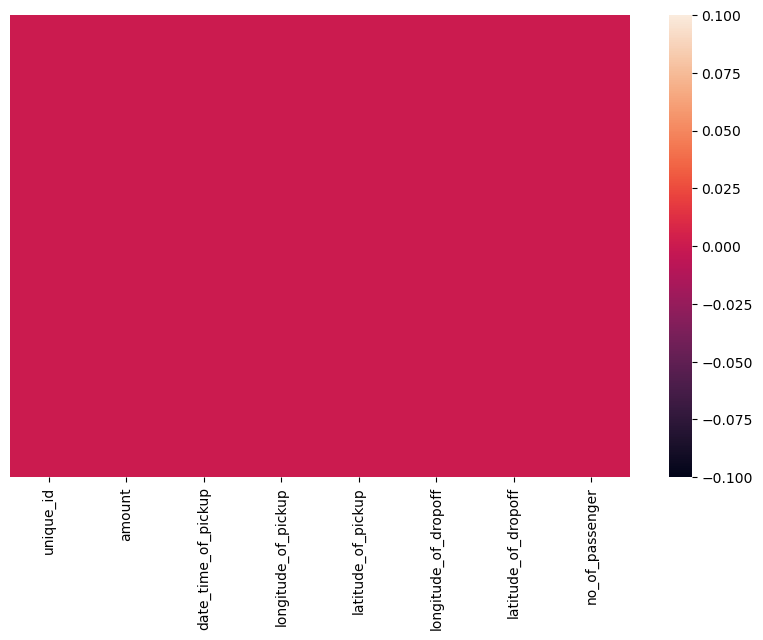

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(TaxiFare_df.isnull(),yticklabels=False)

####  IT IS SEEN THAT NO NULL VALUES ARE PRESENT IN THE DATASET

In [11]:
TaxiFare_df.tail(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49990,16:00.0,4.5,2013-07-18 00:16:00 UTC,-74.002857,40.734137,-74.001610,40.739282,1
49991,56:19.0,10.5,2013-10-17 19:56:19 UTC,-73.991685,40.739494,-73.985357,40.731971,1
49992,41:47.0,6.1,2009-06-06 10:41:47 UTC,-73.984673,40.768434,-73.988215,40.760082,1
49993,27:00.0,7.3,2011-04-07 14:27:00 UTC,-73.982363,40.765060,-73.969167,40.761268,1
49994,57:00.0,8.5,2012-10-13 19:57:00 UTC,-73.976212,40.744832,-73.981567,40.724635,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


### converting date_time_of_pickup in proper'%Y-%m-%d %H:%M:%S UTC'

In [12]:
TaxiFare_df["date_time_of_pickup"] = pd.to_datetime(TaxiFare_df["date_time_of_pickup"], format='%Y-%m-%d %H:%M:%S UTC')

In [13]:
TaxiFare_df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
dtype: object

### EAXCT HOUR DATE DAY MONTH YEAR

In [14]:
TaxiFare_df['Hour'] = TaxiFare_df['date_time_of_pickup'].dt.hour
TaxiFare_df['minute'] = TaxiFare_df['date_time_of_pickup'].dt.minute
TaxiFare_df['date'] = TaxiFare_df['date_time_of_pickup'].dt.day
TaxiFare_df['day'] = TaxiFare_df['date_time_of_pickup'].dt.dayofweek
TaxiFare_df['month'] = TaxiFare_df['date_time_of_pickup'].dt.month
TaxiFare_df['year'] = TaxiFare_df['date_time_of_pickup'].dt.year

### since we have all hour,date,day,month and year no need of column date_time_of_pickup

In [15]:
TaxiFare_df.drop(["date_time_of_pickup"],axis=1,inplace=True)

In [16]:
TaxiFare_df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
Hour                      int64
minute                    int64
date                      int64
day                       int64
month                     int64
year                      int64
dtype: object

In [17]:
TaxiFare_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,29.665420,15.672040,3.029980,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,17.306535,8.660789,1.956936,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,15.000000,8.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,59.000000,31.000000,6.000000,12.000000,2015.000000


In [18]:
TaxiFare_df.describe(include="all")

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
count,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,29.665420,15.672040,3.029980,6.273300,2011.739260
std,NaN,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,17.306535,8.660789,1.956936,3.461157,1.862639
min,NaN,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,NaN,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,15.000000,8.000000,1.000000,3.000000,2010.000000
50%,NaN,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000
75%,NaN,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000


## FINDING OUTLIERS

<AxesSubplot:xlabel='no_of_passenger', ylabel='Density'>

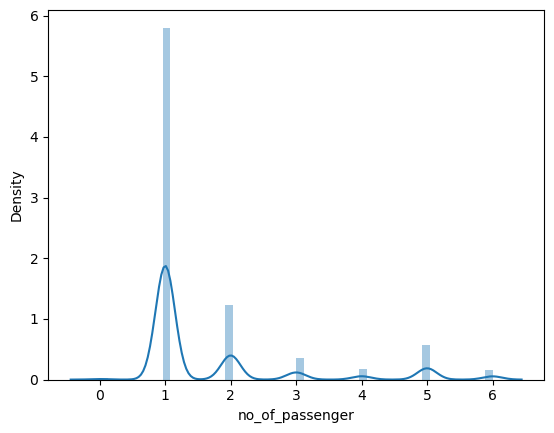

In [19]:
sns.distplot(TaxiFare_df.no_of_passenger)

In [20]:
TaxiFare_df[TaxiFare_df["no_of_passenger"]==0]

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
314,16:15.0,34.0,-73.974899,40.751095,-73.908546,40.881878,0,23,16,2,1,6,2015
566,33:18.0,4.9,-73.955322,40.782840,-73.955797,40.773673,0,21,33,28,5,1,2012
678,24:20.0,6.5,-73.983397,40.738183,-73.971395,40.758023,0,7,24,27,0,2,2012
1160,58:48.0,13.3,-73.998360,40.740348,-73.946455,40.777348,0,23,58,25,2,5,2011
1935,09:28.0,10.1,-73.971400,40.795000,-73.967900,40.768600,0,11,9,23,6,10,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,-73.988813,40.731228,-73.954773,40.733567,0,22,57,3,1,4,2012
47401,41:22.0,9.7,-73.991375,40.732217,-73.976507,40.758900,0,12,41,8,3,3,2012
47920,45:00.0,5.3,-73.966112,40.794478,-73.953933,40.787287,0,18,45,11,6,3,2012
48118,56:28.0,8.1,-73.973382,40.743915,-73.948883,40.777647,0,19,56,25,4,3,2011


In [21]:
(TaxiFare_df["no_of_passenger"]==0).value_counts()

False    49835
True       165
Name: no_of_passenger, dtype: int64

In [22]:
#### since the count is very less removing the rows containing passenger count=0 is better

In [23]:
TaxiFare_df.drop(TaxiFare_df.index[TaxiFare_df.no_of_passenger == 0],inplace=True)
TaxiFare_df.sample(20)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
8283,21:08.0,5.00,-73.982162,40.767380,-73.982292,40.777222,1,14,21,28,5,3,2015
46176,53:00.0,16.50,-73.984997,40.724367,-73.989368,40.666392,1,21,53,15,4,6,2012
23186,48:00.0,6.00,-73.977470,40.680830,-73.963810,40.682840,5,0,48,1,6,6,2014
33281,52:00.0,7.30,-74.009152,40.706453,-73.990295,40.729052,5,1,52,19,6,9,2010
37681,52:12.0,22.50,-74.016463,40.716545,-73.982725,40.750781,1,8,52,27,4,12,2013
18675,09:34.0,20.00,-73.969894,40.760044,-74.010048,40.705845,1,20,9,27,2,5,2015
26601,57:38.0,56.80,-73.981943,40.755611,-73.790555,40.644104,1,15,57,17,0,12,2012
15563,58:12.0,13.00,-74.006630,40.731526,-73.976829,40.752059,1,17,58,25,0,8,2014
17275,47:00.0,8.10,-73.968715,40.799033,-73.982990,40.771420,1,20,47,16,1,11,2010
43504,17:49.0,13.00,-74.011479,40.710936,-74.002829,40.756127,3,9,17,27,1,11,2012


In [24]:
pd.crosstab(TaxiFare_df["amount"],TaxiFare_df["no_of_passenger"])

no_of_passenger,1,2,3,4,5,6
amount,,,,,,
-5.0,1,0,0,0,0,0
-3.0,0,0,0,1,0,0
-2.9,1,0,0,0,0,0
-2.5,3,0,0,0,0,0
0.0,3,0,0,0,0,0
...,...,...,...,...,...,...
149.0,0,0,0,1,0,0
160.0,1,0,0,0,0,0
165.0,2,0,0,0,0,0


#### we notice that the fare amount is in negative which is not possible 

In [25]:
(TaxiFare_df["amount"]<=0).value_counts()

False    49826
True         9
Name: amount, dtype: int64

In [26]:
TaxiFare_df.drop(TaxiFare_df.index[TaxiFare_df.amount <=0],inplace=True)

In [27]:
pd.crosstab(TaxiFare_df["amount"],TaxiFare_df["no_of_passenger"])

no_of_passenger,1,2,3,4,5,6
amount,,,,,,
0.01,1,0,0,0,0,0
2.50,169,15,4,0,12,2
2.90,87,20,4,1,6,0
3.00,68,7,0,1,7,0
3.30,264,55,22,11,24,1
...,...,...,...,...,...,...
149.00,0,0,0,1,0,0
160.00,1,0,0,0,0,0
165.00,2,0,0,0,0,0


<AxesSubplot:xlabel='amount', ylabel='count'>

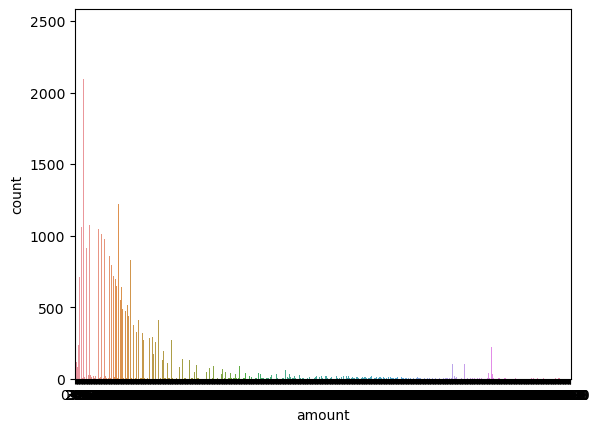

In [28]:
sns.countplot(x="amount",data=TaxiFare_df)

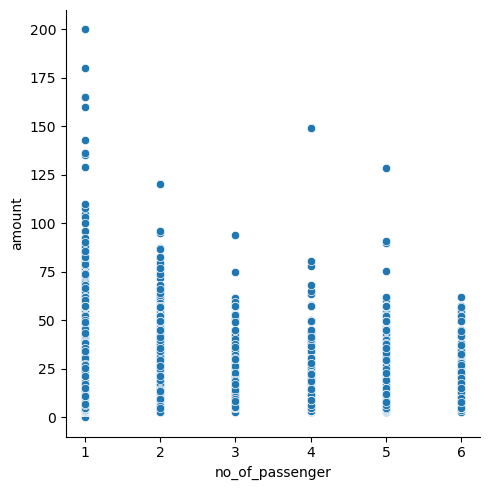

In [29]:
sns.relplot(x="no_of_passenger",y="amount",data=TaxiFare_df)

### finding outliers through mathematical calculation

#### FOR NO_OF_PASSENGER

In [30]:
Q1 = TaxiFare_df['no_of_passenger'].quantile(0.25)
Q3 = TaxiFare_df['no_of_passenger'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -0.5
Upper : 3.5


In [31]:
TaxiFare_df.drop(TaxiFare_df.index[TaxiFare_df.no_of_passenger >4],inplace=True)

<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

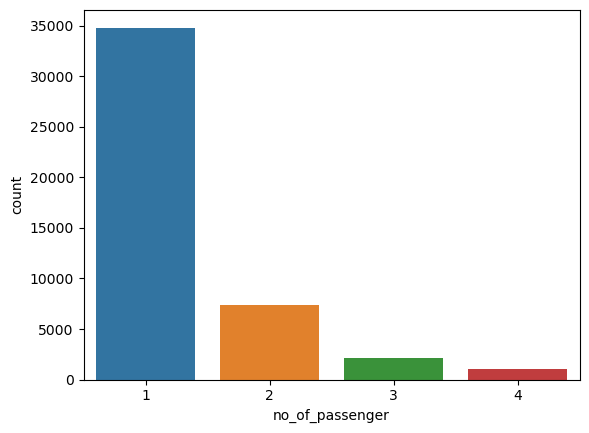

In [32]:
sns.countplot(x="no_of_passenger",data=TaxiFare_df)

## for fare 

In [33]:
Q1 = TaxiFare_df['amount'].quantile(0.25)
Q3 = TaxiFare_df['amount'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -3.75
Upper : 22.25


In [34]:
TaxiFare_df1=TaxiFare_df.drop(TaxiFare_df.index[TaxiFare_df.amount >17])

In [35]:
TaxiFare_df.shape

(45384, 13)

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

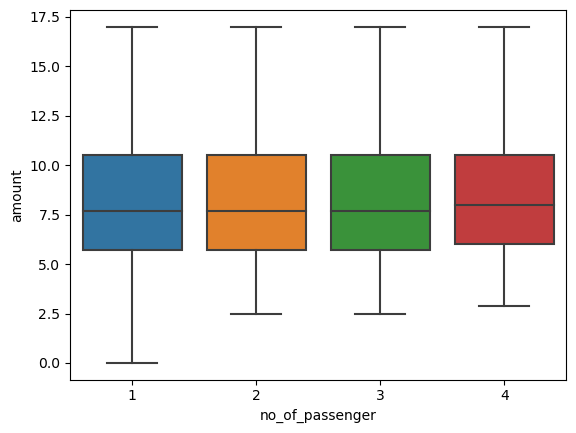

In [36]:
sns.boxplot(x="no_of_passenger",y="amount",data=TaxiFare_df1)

In [37]:
### there are no outlier but using IQR we found upper range for amount=22.5 so can't ignore that

In [38]:
TaxiFare_df.drop(TaxiFare_df.index[TaxiFare_df.amount >23],inplace=True)

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

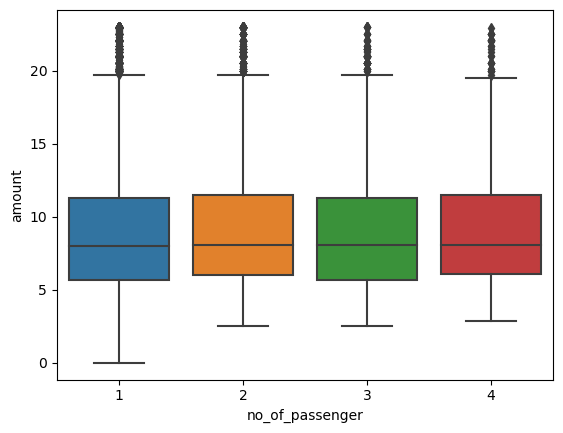

In [39]:
sns.boxplot(x="no_of_passenger",y="amount",data=TaxiFare_df)

<AxesSubplot:xlabel='amount', ylabel='count'>

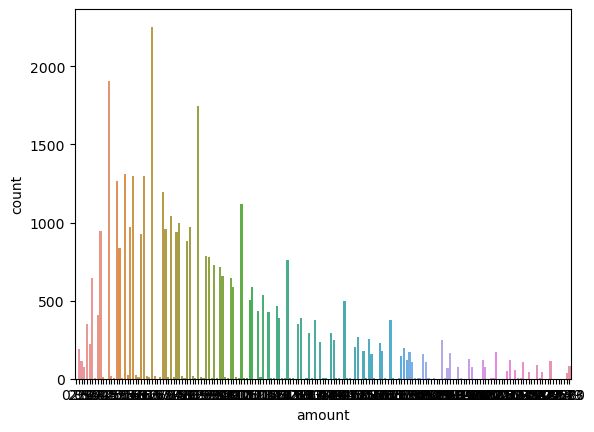

In [40]:
sns.countplot(x="amount",data=TaxiFare_df)

### Calculate distance using Haversion formulas

In [41]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [42]:
TaxiFare_df['distance'] = TaxiFare_df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)

#### as the distance is calculated so no use of pickup and dropoff values

In [43]:
TaxiFare_df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

In [44]:
TaxiFare_df.dtypes

unique_id           object
amount             float64
no_of_passenger      int64
Hour                 int64
minute               int64
date                 int64
day                  int64
month                int64
year                 int64
distance           float64
dtype: object

In [45]:
corr_mat=TaxiFare_df.corr()
corr_mat

,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
amount,1.000000,0.012277,-0.012183,-0.002931,-0.006105,0.025066,0.031086,0.150527,0.013126
no_of_passenger,0.012277,1.000000,0.028327,0.003924,0.009293,0.077540,0.012813,-0.024042,0.000189
Hour,-0.012183,0.028327,1.000000,-0.001280,-0.006151,-0.087938,-0.000939,0.005929,-0.003580
minute,-0.002931,0.003924,-0.001280,1.000000,-0.000162,0.001572,-0.003663,0.000999,-0.003095
date,-0.006105,0.009293,-0.006151,-0.000162,1.000000,0.007820,-0.015374,-0.010632,0.009527
day,0.025066,0.077540,-0.087938,0.001572,0.007820,1.000000,-0.009581,0.008628,0.000204
month,0.031086,0.012813,-0.000939,-0.003663,-0.015374,-0.009581,1.000000,-0.112311,-0.015122
year,0.150527,-0.024042,0.005929,0.000999,-0.010632,0.008628,-0.112311,1.000000,0.024247
distance,0.013126,0.000189,-0.003580,-0.003095,0.009527,0.000204,-0.015122,0.024247,1.000000


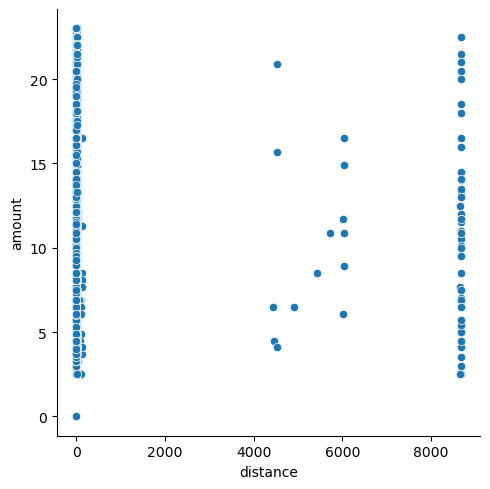

In [46]:
sns.relplot(x="distance",y="amount",data=TaxiFare_df)

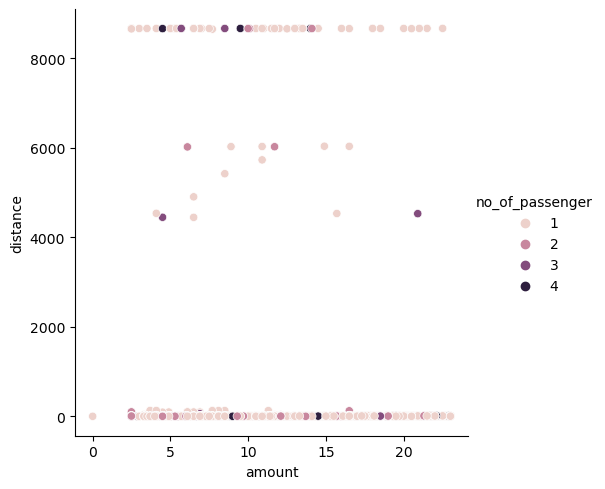

In [47]:
sns.relplot(x="amount",y="distance",hue="no_of_passenger",data=TaxiFare_df)

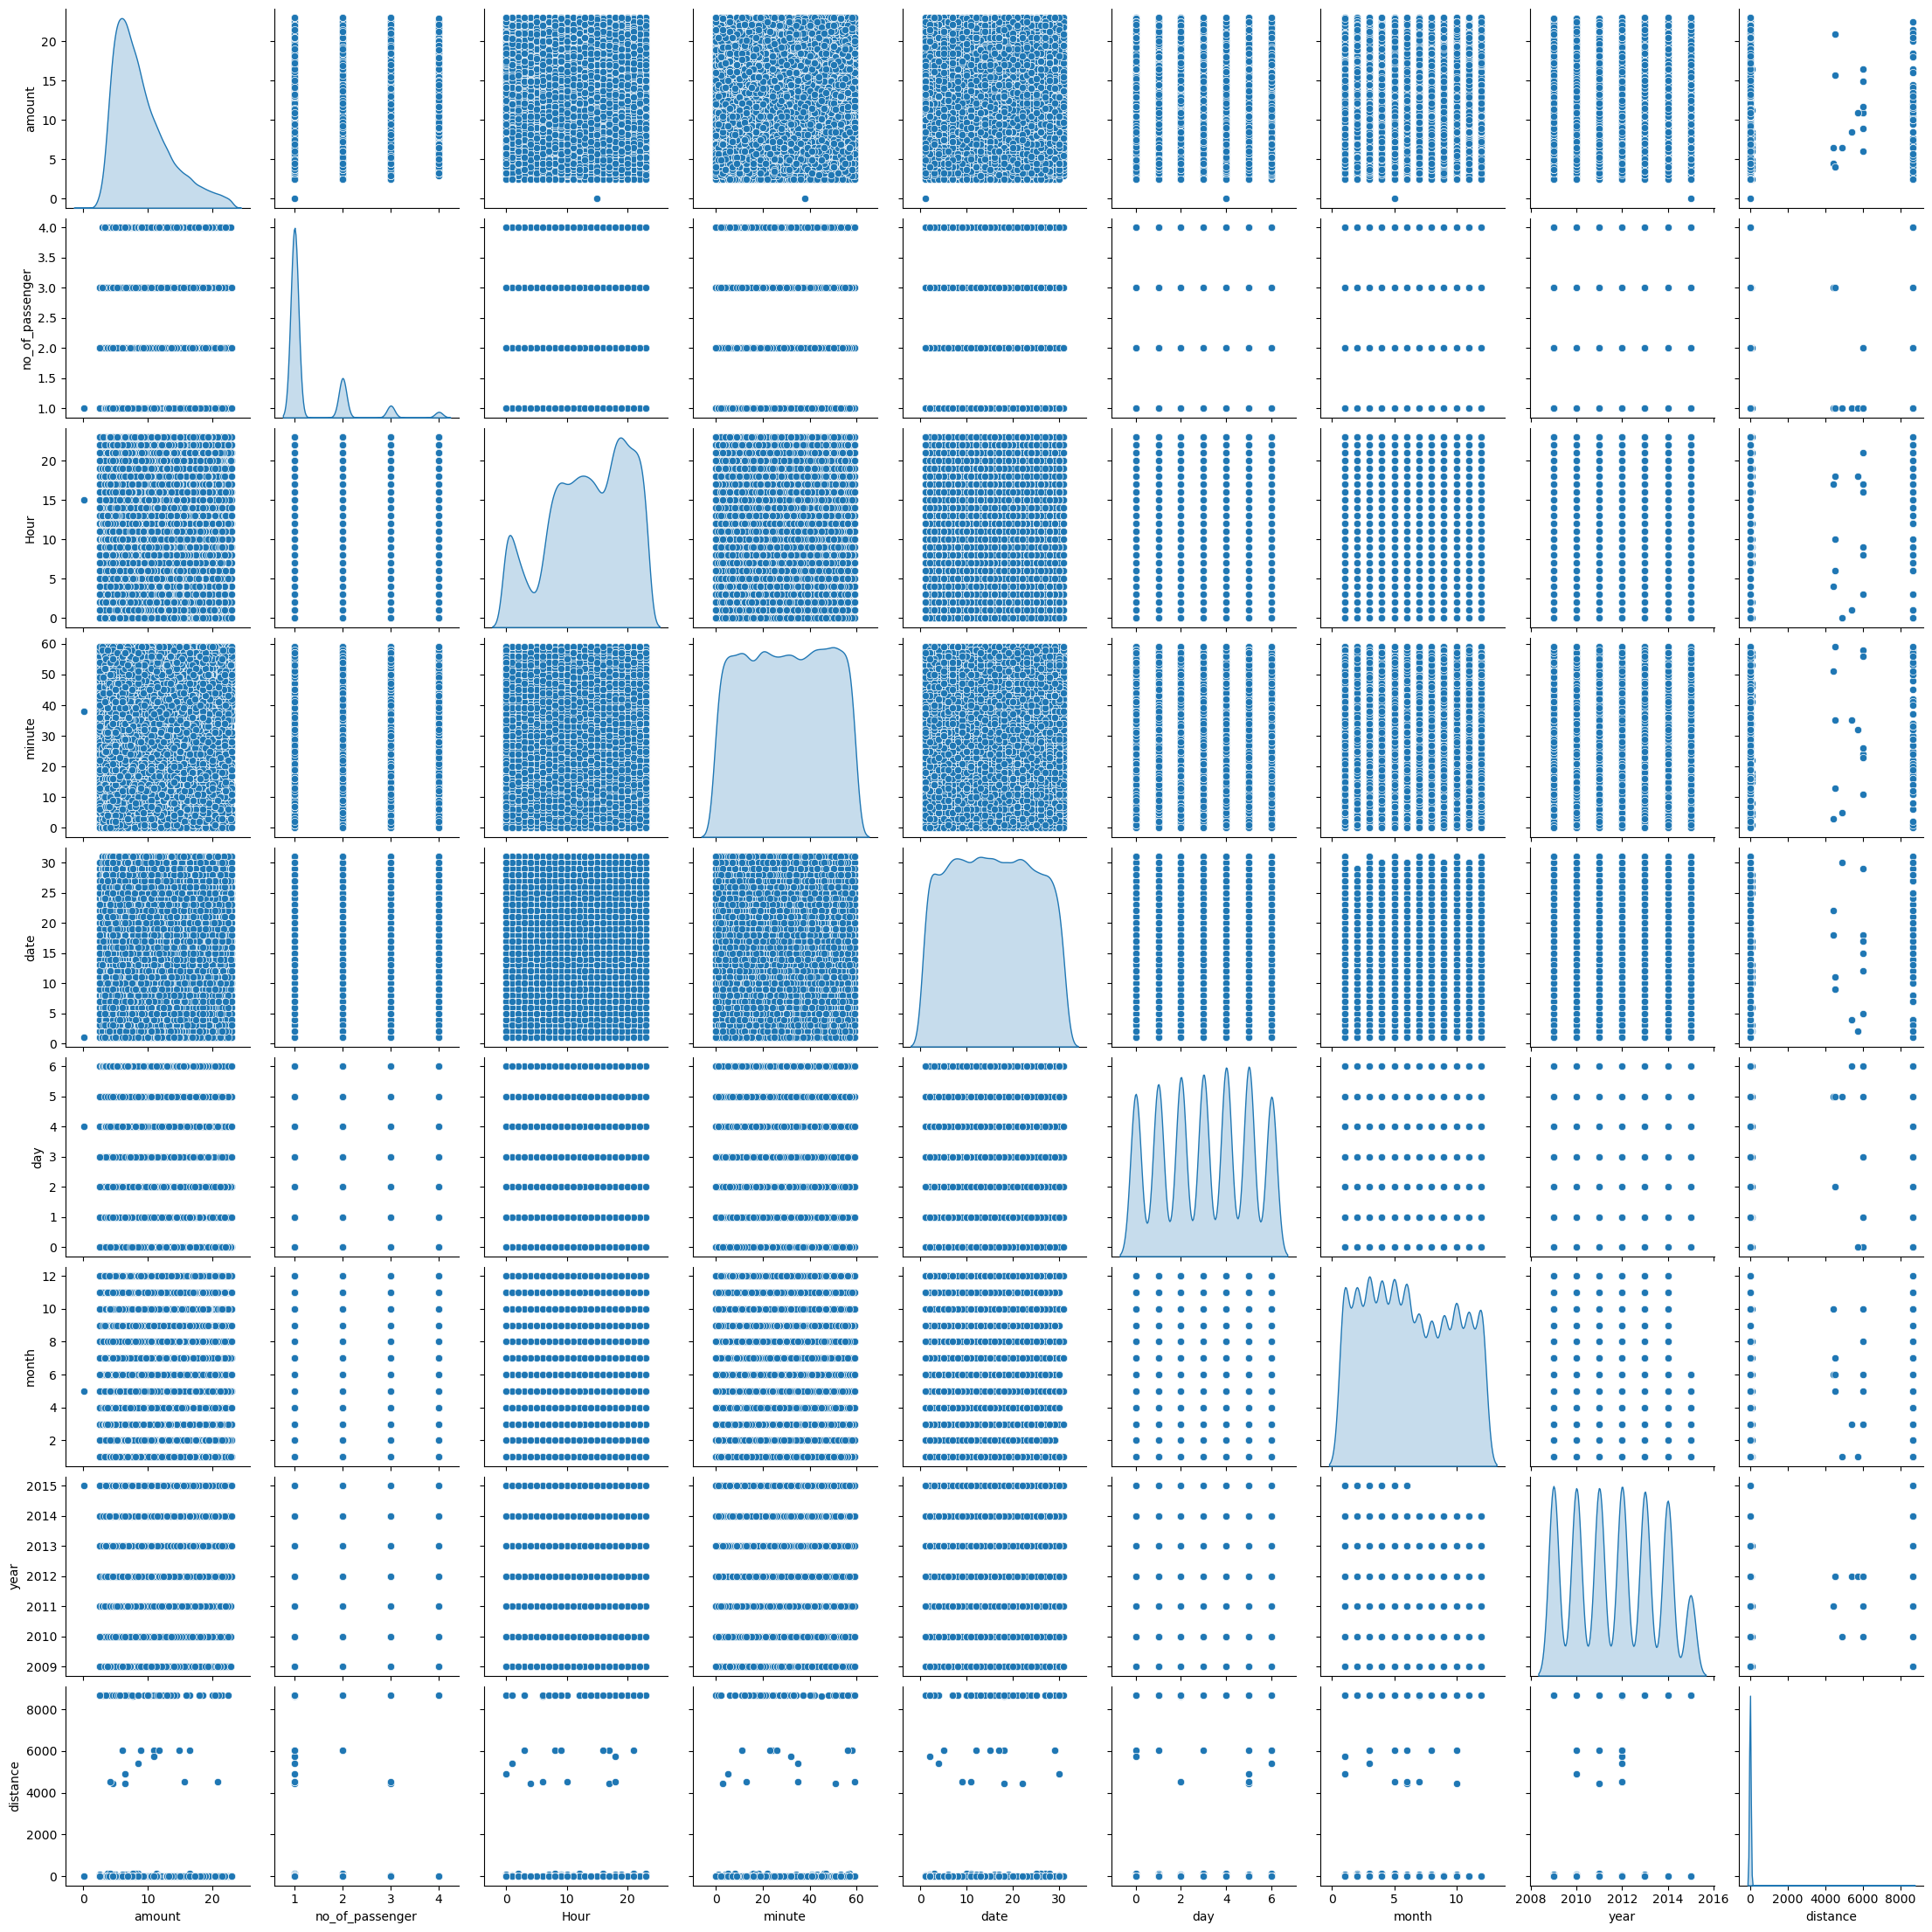

In [48]:
sns.pairplot(TaxiFare_df,diag_kind="kde")
plt.show()

In [49]:
#dropping categorical value
TaxiFare_df.drop(["unique_id"],axis=1,inplace=True)

# SPLIT DATASET

In [50]:
x=TaxiFare_df.drop(["amount"],axis=1)
y=TaxiFare_df[["amount"]]

In [51]:
x_train, x_test, y_train ,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

## MODEL SELECTION

In [52]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [53]:
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

0.025890109652448312
0.02603572670376253


In [54]:
poly =PolynomialFeatures(degree=2,interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))

0.027289293968210226


In [55]:
print(poly_clf.score(x_test2,y_test))

0.026370853327284727


In [56]:
model2 =DecisionTreeRegressor(max_depth=3,criterion='squared_error')
model2.fit(x_train,y_train)
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.6524018779991517
0.6465917450337724


In [57]:
model3= BaggingRegressor(n_estimators=20,base_estimator=model2) 
model3.fit(x_train,y_train)
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.6703156827804783
0.6621996808877255


In [58]:
model4= AdaBoostRegressor(n_estimators=20)
model4.fit(x_train,y_train)
print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

0.5941015323712069
0.587454611614562


In [59]:
model5= GradientBoostingRegressor(n_estimators=20,criterion="squared_error")
model5.fit(x_train,y_train)
print(model5.score(x_train,y_train))
print(model5.score(x_test,y_test))

0.6947242831136051
0.6886331058481661


In [60]:
model6= RandomForestRegressor(max_depth=6,criterion='squared_error',n_estimators=50)
model6.fit(x_train,y_train)
print(model6.score(x_train,y_train))
print(model6.score(x_test,y_test))

0.7286543345705454
0.7138658318348092


In [61]:
model7= SVR(degree=20,C=20,kernel='rbf')
model7.fit(x_train,y_train)
print(model7.score(x_train,y_train))
print(model7.score(x_test,y_test))

0.1338052391517901
0.14981203309149926


### For this dataset RandomForest is better than any other model as per above observation